In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [2]:
data_path = 'excel/data.xlsx'
save_path = './excel/extract/data_imput/data_2.xlsx'

data_origin = pd.read_excel(data_path,sheet_name='表单2')
data = data_origin.iloc[:,1:]
data.head()

,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,69.33,NaN,9.99,6.32,0.87,3.93,1.74,3.87,NaN,NaN,1.17,NaN,NaN,0.39
1,36.28,NaN,1.05,2.34,1.18,5.73,1.86,0.26,47.43,NaN,3.57,0.19,NaN,NaN
2,87.05,NaN,5.19,2.01,NaN,4.06,NaN,0.78,0.25,NaN,0.66,NaN,NaN,NaN
3,61.71,NaN,12.37,5.87,1.11,5.50,2.16,5.09,1.41,2.86,0.70,0.10,NaN,NaN
4,65.88,NaN,9.67,7.12,1.56,6.44,2.06,2.18,NaN,NaN,0.79,NaN,NaN,0.36


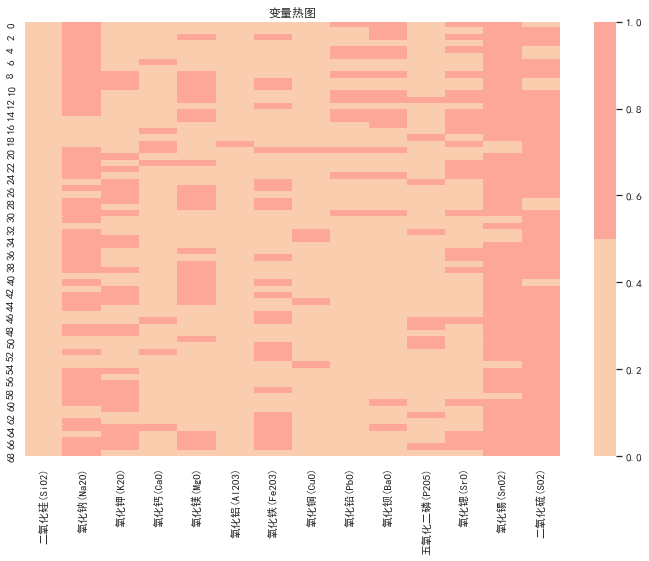

In [3]:
### 绘制缺失变量的热图
def miss_heatamp(data,title):
    cols = data.columns
    colours = ['#f9cdad', '#fca79a']  ## 第一项没缺失的颜色，第二项，缺失的颜色

    plt.figure(figsize=(12,8 ))
    # plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
    # plt.rcParams['axes.unicode_minus'] = False    # 解决无法显示符号的问题
    sns.set(font='SimHei', font_scale=1)
    f = sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours))
    f.set_title(title)
    plt.savefig('1.png')

miss_heatamp(data,'变量热图')

             miss_num
氧化钠(Na2O)          50
氧化钾(K2O)           28
氧化钙(CaO)            8
氧化镁(MgO)           25
氧化铝(Al2O3)          1
氧化铁(Fe2O3)         24
氧化铜(CuO)            5
氧化铅(PbO)           11
氧化钡(BaO)           16
五氧化二磷(P2O5)        10
氧化锶(SrO)           23
氧化锡(SnO2)          62
二氧化硫(SO2)          61


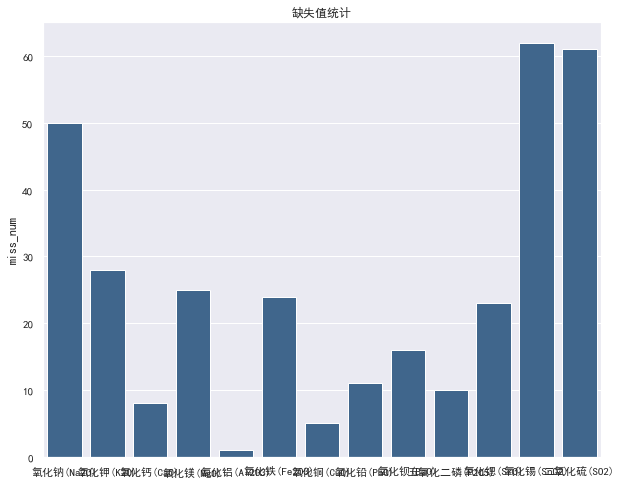

In [4]:
##### 绘制缺失变量的直方图
def miss_bar(data,title):
    '''
    data : dataframe格式的数据，行为数据，列为特征 
    title : 图表名字
    '''
    missValue2miss_num={}
    for col in data.columns:
        missing = data[col].isnull()
        num_missing = np.sum(missing)
        if num_missing > 0:  
            missValue2miss_num[col] = num_missing
    df = pd.DataFrame([missValue2miss_num])
    df.index=['miss_num']
    df = df.T
    print(df)
    
    plt.figure(figsize=(10,8 ))
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
    plt.rcParams['axes.unicode_minus'] = False    # 解决无法显示符号的问题
    sns.set(font='SimHei', font_scale=1)

    f = sns.barplot(x=df.index,y=df['miss_num'],color='#336699')
    f.set_title(title)


miss_bar(data,'缺失值统计')

In [5]:
def rf_impute(data):
    '''
    data:dataframe格式
    '''
    copy_data = data.copy()
    miss_columns = copy_data.isnull().sum()[copy_data.isnull().sum() != 0].sort_values().index.tolist()
    unmiss_columns = copy_data.isnull().sum()[copy_data.isnull().sum() == 0].sort_values().index.tolist()
    for col in miss_columns:
        X_train = copy_data[copy_data[col].notnull()][unmiss_columns].values
        Y_train = copy_data[copy_data[col].notnull()][col].values
        X_test = copy_data[copy_data[col].isnull()][unmiss_columns][unmiss_columns].values
        rfr=RandomForestRegressor()
        rfr.fit(X_train,Y_train)
        predict_value = rfr.predict(X_test)

        copy_data.loc[(copy_data[col].isnull()), col] = predict_value
        unmiss_columns.append(col)
    return copy_data

imp_data = rf_impute(data)
imp_data.to_excel(save_path)
imp_data

,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,69.33,3.8947,9.9900,6.3200,0.8700,3.93,1.7400,3.87,1.4833,6.3269,1.170,0.1155,0.6727,0.3900
1,36.28,2.8689,1.0500,2.3400,1.1800,5.73,1.8600,0.26,47.4300,8.0438,3.570,0.1900,0.5262,3.5817
2,87.05,2.4438,5.1900,2.0100,0.9488,4.06,0.8273,0.78,0.2500,2.3957,0.660,0.1182,0.7641,0.8677
3,61.71,3.8766,12.3700,5.8700,1.1100,5.50,2.1600,5.09,1.4100,2.8600,0.700,0.1000,0.6879,0.4910
4,65.88,3.5792,9.6700,7.1200,1.5600,6.44,2.0600,2.18,0.5770,1.0845,0.790,0.0837,1.0962,0.3600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,17.11,2.8970,0.4861,4.5602,1.1100,3.65,1.6893,1.34,58.4600,7.7893,14.130,1.1200,0.4473,7.0311
65,49.01,2.7100,0.2839,1.1300,0.7132,1.45,0.4064,0.86,32.9200,7.9500,0.350,0.2796,0.5874,5.3894
66,29.15,3.5551,0.2744,1.2100,0.7617,1.85,0.6214,0.79,41.2500,15.4500,2.540,0.4954,0.5630,7.2144
67,25.42,3.4824,0.2886,1.3100,0.7714,2.18,0.7144,1.16,45.1000,17.3000,3.079,0.4974,0.5484,6.2987


In [6]:
data = pd.read_excel('excel\extract\data_imput\data_2_firststep.xlsx',sheet_name='Sheet3')
data.head()

,文物采样点,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),sum,diff,orgin,after,target
0,01,0,3.8511,0.0,0.0,0.0000,0.0,0.000,0.0,1.8062,4.6092,0.0,0.1042,0.7421,0.0000,11.1128,2.39,97.61,108.7228,100.0
1,02,0,2.8848,0.0,0.0,0.0000,0.0,0.000,0.0,0.0000,8.3110,0.0,0.0000,0.5252,4.1328,15.8538,0.11,99.89,115.7438,100.0
2,03部位1,0,2.3721,0.0,0.0,1.0582,0.0,1.123,0.0,0.0000,2.5339,0.0,0.1092,0.7454,1.1611,9.1029,0.00,100.00,109.1029,100.0
3,03部位2,0,3.8233,0.0,0.0,0.0000,0.0,0.000,0.0,0.0000,0.0000,0.0,0.0000,0.7143,0.4258,4.9634,1.12,98.88,103.8434,100.0
4,04,0,3.5114,0.0,0.0,0.0000,0.0,0.000,0.0,0.6980,1.3866,0.0,0.0769,1.3745,0.0000,7.0474,3.94,96.06,103.1074,100.0


In [7]:
for i in range(data.shape[0]):
    # for j in data.loc[i, '二氧化硅(SiO2)':'二氧化硫(SO2)']:
    for j in range(1,15):
        if data.loc[i,'diff']>2:
            data.loc[i,'diff']=2
        data.iloc[i, j] = data.iloc[i, j] / data.loc[i,'sum']*data.loc[i,'diff']

data.to_excel('excel/extract/data_imput/data_2_second.xlsx')
data

PermissionError: [Errno 13] Permission denied: 'excel/extract/data_imput/data_2_second.xlsx'

[ 97  99 100  98  96  96  98  98  99  99  98  99  99  95  99  98  99  79
  98  71  97  98  88  98 100  96  98  97  99  99  98  98  99  97  98  98
  98  99  97  96  97  99  98  98  98  93  98  97  94  96  99  98  98  97
  99  95  98  90  96  95  91  94  98  99  96  96  92  92  98]
29


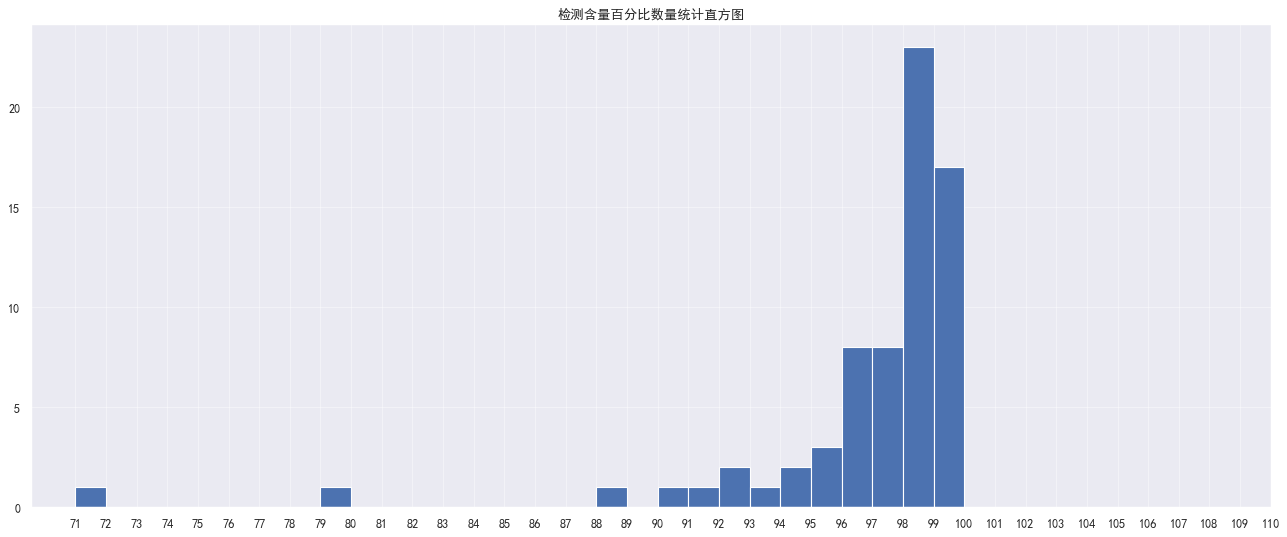

In [11]:
'''
    组数=极差/组距
'''
from matplotlib import pyplot as plt
from matplotlib import font_manager
import random
 
a = np.array([97.61,99.89,100,98.88,96.06,96.51,98.92,98.84,99.7,99.82,98.24,99.77,99.81,95.39,99.57,98.14,99,79.47,98.41,71.89,97.25,98.76,88.41,98.52,100,96.5,98.88,97.06,99.82,99.89,98.81,98.69,99.88,97.95,98.7,98.43,98.66,99.96,97.52,96.21,97.63,99.98,98.57,98.76,98.57,93.71,98.01,97.9,94.68,96.67,99.12,98.34,98.63,97.26,99.17,95.5,98.24,90.17,96.94,95.33,91.7,94.08,98.25,99.67,96.92,96.38,92.24,92.47,98.76])
a= a.astype('int')
print(a)
print(max(a)-min(a))
 
# 计算组数
d = 1  # 组距
num_bins = (max(a)-min(a))//d
 
# 设置图形大小
plt.figure(figsize=(20, 8), dpi=80)
plt.hist(a, num_bins)
 
# 设置x轴刻度
plt.xticks(range(min(a), max(a)+d+10, d))
# 设置网格
plt.grid(alpha=0.4)
plt.title('检测含量百分比数量统计直方图')
plt.savefig('./excel/result/data_deal/detect_ratio.png')
plt.show()


69 96.40579710144928 4.417746952095063


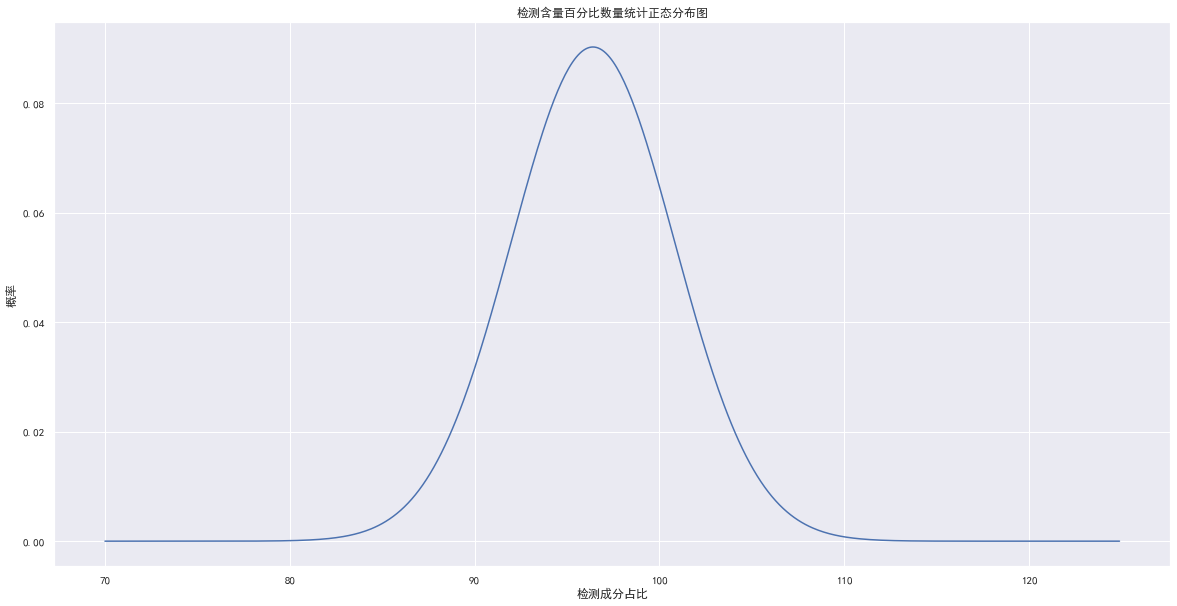

In [27]:
#
# 本文以某一批产品的长度为数据集
# 在此数据集的基础上绘制直方图和正态分布曲线

import pandas as pd  # pandas是一个强大的分析结构化数据的工具集
import numpy as np  # numpy是Python中科学计算的核心库
import matplotlib.pyplot as plt  # matplotlib数据可视化神器

# 正态分布的概率密度函数
#   x      数据集中的某一具体测量值
#   mu     数据集的平均值，反映测量值分布的集中趋势
#   sigma  数据集的标准差，反映测量值分布的分散程度
def normfun(x, mu, sigma):
    pdf = np.exp(-((x - mu) ** 2) / (2 * sigma ** 2)) / (sigma * np.sqrt(2 * np.pi))
    return pdf


length = a.shape[0] # 获得长度数据集
mean = np.mean(a) # 获得数据集的平均值
std = np.std(a)   # 获得数据集的标准差
print(length,mean,std)

# 设定X轴：前两个数字是X轴的起止范围，第三个数字表示步长
# 步长设定得越小，画出来的正态分布曲线越平滑
x = np.arange(70, 125, 0.1)
# 设定Y轴，载入刚才定义的正态分布函数
y = normfun(x, mean, std)
# 绘制数据集的正态分布曲线
plt.figure(figsize=(20,10))
plt.plot(x, y)

# 绘制数据集的直方图
plt.title('Length distribution')
plt.xlabel('检测成分占比')
plt.ylabel('概率')
plt.title('检测含量百分比数量统计正态分布图')
plt.savefig('./excel/result/data_deal/detect.png')
# 输出正态分布曲线和直方图
plt.show()